## Software Packages

We will be using a wide range of different Python software packages. To install and manage these packages we will be using the Conda environment manager. The following is a list of packages we will routinely use in lectures and homeworks:

In [1]:
# Linear algebra, probability
import numpy as np

# Data manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualization library
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

## 2. Data Acquisition and Cleaning

In [11]:
# pd stands for pandas, which we will learn starting from next lecture
# Some pandas syntax shared with data8's datascience package
majors = pd.read_csv("../data/lec01/majors.csv")
names = pd.read_csv("../data/lec01/names.csv")

## 3. Exploratory Data Analysis

#### Peeking at the Data

In [12]:
# Let's peek at the first 20 rows of the majors dataframe

majors.head(20)

,Majors,Terms in Attendance
0,Letters & Sci Undeclared UG,3
1,Data Science BA,7
2,Economics BA,8
3,Letters & Sci Undeclared UG,5
4,Economics BA,7
5,"Computer Science BA, Economics BA",7
6,"Business Administration BS, Letters & Sci Unde...",5
7,Letters & Sci Undeclared UG,5
8,Microbial Biology BS,5
9,Letters & Sci Undeclared UG,8


In [13]:
# Let's peek at the first 5 rows (default) of the names dataframe

names.head()

,Name,Role
0,Emily,Student
1,Zoe,Student
2,Michelle,Student
3,JAMES,Student
4,Jenny,Student


What is one potential issue we may need to address in this data?

Answer: Some names appear capitalized.

In the above sample we notice that some of the names are capitalized and some are not. This will be an issue in our later analysis so let's convert all names to lower case.

In [14]:
names['Name'] = names['Name'].str.lower()

In [15]:
names.head()

,Name,Role
0,emily,Student
1,zoe,Student
2,michelle,Student
3,james,Student
4,jenny,Student


In [16]:
# Below are the most common, in descending frequency

first_letter = names['Name'].str[0].value_counts()
first_letter.head()

Name
a    192
j    137
s    130
m     97
e     72
Name: count, dtype: int64

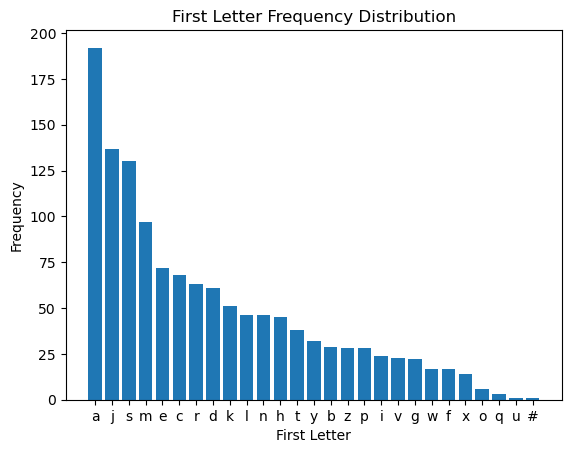

In [17]:
# Let's visualize this first letter distribution 

plt.bar(first_letter.index, first_letter.values)
plt.xlabel('First Letter')
plt.ylabel('Frequency')
plt.title('First Letter Frequency Distribution')
plt.show()

In the United States, "J" and "A" names are the most popular first initials. Seems like our visualization also reflects this!

What is the distribution of the length of names?

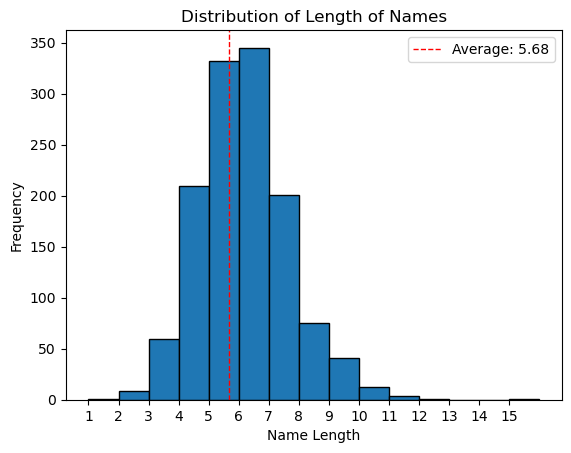

In [18]:
name_lengths = names['Name'].str.len()

plt.hist(name_lengths, bins=range(min(name_lengths), max(name_lengths) + 2), edgecolor='black')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Names')
average_length = name_lengths.sum() / len(name_lengths)
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=1, label=f'Average: {average_length:.2f}')
plt.legend()
plt.xticks(range(min(name_lengths), max(name_lengths) + 1))
plt.show()

The average length of names in the United States is also around 6 letters!

How many records do we have?

What is the meaning of the Role field?
Answer: Understanding the meaning of an attribute can be achieved by looking at the types of data it contains (in particular, the counts of its unique values).

We use the value_counts() function in pandas:

In [19]:
names['Role'].value_counts().to_frame()  # counts of unique Roles

,count
Role,
Student,1290
#REF!,1


In [20]:
# Boolean index to find rows where Role is #REF!
names[names['Role'] == "#REF!"]

,Name,Role
737,#ref!,#REF!


In [21]:
names = names[names['Role'] != "#REF!"]

Double check: Let's double check that our record removal only removed the single bad record.

In [22]:
names['Role'].value_counts().to_frame()  # Again, counts of unique Roles

,count
Role,
Student,1290


Exploratory Data Analysis on majors dataset

In [24]:
majors.columns   # Get column names

Index(['Majors', 'Terms in Attendance'], dtype='object')

In [25]:
majors['Terms in Attendance'].value_counts().to_frame()

,count
Terms in Attendance,
5,539
7,351
3,171
G,124
8,75
6,22
4,8
#REF!,1


In [26]:
majors[majors['Terms in Attendance'] == "#REF!"]

,Majors,Terms in Attendance
597,#REF!,#REF!


In [27]:
majors = majors[majors['Terms in Attendance'] != "#REF!"]
majors['Terms in Attendance'].value_counts().to_frame()

,count
Terms in Attendance,
5,539
7,351
3,171
G,124
8,75
6,22
4,8


#### Summarizing the Data

We will often want to numerically or visually summarize the data. The describe() method provides a brief high level description of our data frame.

In [28]:
names.describe()

,Name,Role
count,1290,1290
unique,933,1
top,ethan,Student
freq,11,1290


In [29]:
majors.describe()

,Majors,Terms in Attendance
count,1290,1290
unique,183,7
top,Letters & Sci Undeclared UG,5
freq,353,539


### What are your majors?
What are the top majors:

In [30]:
majors_count = (       # Method chaining in pandas
    majors['Majors']
    .value_counts()
    .sort_values(ascending=False) # Highest first
    .to_frame()
    .head(20)          # Get the top 20
)

majors_count

,count
Majors,
Letters & Sci Undeclared UG,353
Data Science BA,129
Computer Science BA,124
Electrical Eng & Comp Sci BS,69
Economics BA,65
Cognitive Science BA,29
Electrical Eng & Comp Sci MEng,25
Applied Mathematics BA,24
Civil Engineering BS,22


We will often use visualizations to make sense of data

In Data 100, we will deal with many different kinds of data (not just numbers) and we will study techniques to describe types of data.

How can we summarize the Majors field? A good starting point might be to use a bar plot:

In [31]:
# Interactive using plotly

fig = px.bar(majors_count.loc[::-1], orientation='h')
fig.update_layout(showlegend=False, 
                  xaxis_title='Count', 
                  yaxis_title='Major',
                  autosize=False, 
                  width=800, 
                  height=500)

### What year are you?

In [32]:
fig = px.histogram(majors['Terms in Attendance'].sort_values(),
                   histnorm='probability')

fig.update_layout(showlegend=False,
                  xaxis_title="Term",
                  yaxis_title="Fraction of Class",
                  autosize=False, 
                  width=800, 
                  height=250)

In [33]:
# Replacing terms in attendance data with the degree objective
majors.loc[majors.loc[:, 'Terms in Attendance'] != 'G', 'Terms in Attendance'] = 'Undergraduate'
majors.loc[majors.loc[:, 'Terms in Attendance'] == 'G', 'Terms in Attendance'] = 'Graduate'


majors.rename(columns={'Terms in Attendance': 'Ungrad Grad'}, inplace=True)

majors.describe()

,Majors,Ungrad Grad
count,1290,1290
unique,183,2
top,Letters & Sci Undeclared UG,Undergraduate
freq,353,1166


## 1. New Questions

What is the ratio between graduate and undergraduate students in Data 100, and how does it compare with campus distribution?

What is the proportion of different majors in Data 100, and how does it compare with historical campus trends?

We often ask this question because we want to improve the data science program here in Berkeley, especially since it has now grown into a new college—College of Computing, Data Science, and Society—Berkeley's first new college in 50 years.

## UC Berkeley Student Headcount by Major and Demographics

Data comes from UC Berkeley's data warehouse reporting system, Cal Answers. Headcount figures are based on the Fall and Spring census snapshots, which occur at the end of the 5th week of the term.

### 2. Acquire data programmatically

Note 2: We also load the data directly into Python.

In Data 100 we will think a bit more about how we can be efficient in our data analysis to support processing large datasets.

In [2]:
university_majors = pd.read_csv('../data/lec01/data.csv', 
                                usecols = ['Academic Yr', 'Semester', 'Ungrad Grad', 
                                           'Entry Status', 'Major Short Nm', 'Student Headcount'])

### 3. Exploratory Data Analysis on Campus Data

In [3]:
# Examining the data
university_majors

,Academic Yr,Semester,Ungrad Grad,Entry Status,Major Short Nm,Student Headcount
0,2014-15,Fall,Graduate,Graduate,Education,335
1,2014-15,Fall,Graduate,Graduate,Educational Leadership Jnt Pgm,1
2,2014-15,Fall,Graduate,Graduate,Special Education,18
3,2014-15,Fall,Graduate,Graduate,Science & Math Education,15
4,2014-15,Fall,Graduate,Graduate,Chemical Engineering,136
...,...,...,...,...,...,...
7199,2023-24,Spring,Undergraduate,Transfer Entrant,Nut Sci-Physio & Metabol,13
7200,2023-24,Spring,Undergraduate,Transfer Entrant,Nutritional Sci-Dietetics,1
7201,2023-24,Spring,Undergraduate,Transfer Entrant,Nutritional Sci-Toxicology,2
7202,2023-24,Spring,Undergraduate,Transfer Entrant,Genetics & Plant Biology,11


The data is reported on a semester basis. We will aggregate data across different semesters in a year by taking average of Fall and Spring semester enrollment information.

In [4]:
# Reporting student data based on academic year
university_majors = (university_majors.groupby(
    ['Academic Yr', 'Ungrad Grad', 'Entry Status', 'Major Short Nm'], as_index = False)[["Student Headcount"]]
                     .mean()
                    )

university_majors

,Academic Yr,Ungrad Grad,Entry Status,Major Short Nm,Student Headcount
0,2014-15,Graduate,Graduate,African American Studies,30.0
1,2014-15,Graduate,Graduate,Ag & Resource Economics,73.5
2,2014-15,Graduate,Graduate,Anc Hist & Medit Archae,14.0
3,2014-15,Graduate,Graduate,Anthropology,76.5
4,2014-15,Graduate,Graduate,Applied Mathematics,18.5
...,...,...,...,...,...
3697,2023-24,Undergraduate,Transfer Entrant,Spanish and Portuguese,16.5
3698,2023-24,Undergraduate,Transfer Entrant,Statistics,46.0
3699,2023-24,Undergraduate,Transfer Entrant,Sustainable Environ Dsgn,4.0
3700,2023-24,Undergraduate,Transfer Entrant,Theater & Perf Studies,44.0


#### What is the historical distribution of graduate and undergraduate students at Berkeley?

In [6]:
university_grad_vs_ungrd = (university_majors.groupby(
    ['Academic Yr', 'Ungrad Grad'], as_index = False)[["Student Headcount"]]
                            .sum()
                           )

proportions = university_grad_vs_ungrd.pivot(index='Academic Yr', columns='Ungrad Grad', values='Student Headcount')
proportions['Total'] = proportions['Undergraduate'] + proportions['Graduate']
proportions['Undergrad Proportion'] = proportions['Undergraduate'] / proportions['Total']
proportions['Grad Proportion'] = proportions['Graduate'] / proportions['Total']


fig = px.bar(proportions.reset_index(), 
             x='Academic Yr', 
             y=['Undergraduate', 'Graduate'],
             title='Number of Grad vs. Undergrad Students',
             labels={'value': 'Number of Students'},
             color_discrete_map={'Undergraduate': 'blue', 'Graduate': 'orange'})

In [7]:
fig.update_layout(barmode='relative', autosize=False, width=800, height=600)
fig.show()

### 4.1. Ratio between graduate and undergraduate students in Data 100, and its comparison with campus distribution

In [34]:
data100_grad = majors['Ungrad Grad'].loc[majors['Ungrad Grad'] == 'Graduate'].count()

data100_undergrad = majors['Ungrad Grad'].loc[majors['Ungrad Grad'] == 'Undergraduate'].count()

print("Number of graduate students in Data 100: ", data100_grad)
print("Number of undergraduate students in Data 100: ", data100_undergrad)

Number of graduate students in Data 100:  124
Number of undergraduate students in Data 100:  1166


In [35]:
data100_row = {'Graduate':[data100_grad], 
               'Undergraduate':[data100_undergrad], 
               'Total':[data100_grad + data100_undergrad], 
               'Undergrad Proportion':[data100_undergrad / (data100_grad + data100_undergrad)],
               'Grad Proportion':[data100_grad / (data100_grad + data100_undergrad)], 
               }

new_row_df = pd.DataFrame(data100_row)

proportions.loc['Data 100'] = new_row_df.iloc[0]


fig = px.bar(proportions.reset_index(), 
             x='Academic Yr', 
             y=['Undergrad Proportion', 'Grad Proportion'],
             title='Proportions of Grad vs. Undergrad Students',
             labels={'value': 'Proportion'},
             color_discrete_map={'Undergrad Proportion': 'blue', 'Grad Proportion': 'orange'})


fig.update_layout(barmode='relative', autosize=False, width=800, height=600)
fig.show()

### 4.2. Proportion of different majors in Data 100, and their historical emrollment trends

In [45]:
data100_top_20_majors = (       # Method chaining in pandas
    majors['Majors'].str.rsplit(' ', n=1).str[0]
    .value_counts()
    .sort_values(ascending=False) # Highest first
    .to_frame()
    .head(20)          # Get the top 20
)

major_trends = university_majors.groupby(['Academic Yr', 'Major Short Nm'], 
                                         as_index = False)[["Student Headcount"]].sum()


print("Top 20 majors at Berkeley in 2022-23")
major_trends[major_trends.loc[:, 'Academic Yr'] == '2022-23'].sort_values('Student Headcount', ascending=False).head(20)

Top 20 majors at Berkeley in 2022-23


,Academic Yr,Major Short Nm,Student Headcount
1790,2022-23,Letters & Sci Undeclared,10651.0
1692,2022-23,CDSS Computer Science,2102.5
1731,2022-23,Electrical Eng & Comp Sci,2093.0
1691,2022-23,Business Administration,1645.5
1727,2022-23,Economics,1579.5
1717,2022-23,Data Science Undergrad Studies,1325.5
1817,2022-23,Molecular & Cell Biology,1225.5
1808,2022-23,Mechanical Engineering,1208.0
1789,2022-23,Law (JD),1023.0
1772,2022-23,Info & Data Science-MIDS,1021.5


In [46]:
print("Top 20 majors at Berkeley in Data 100")
print(data100_top_20_majors)

Top 20 majors at Berkeley in Data 100
                                                    count
Majors                                                   
Letters & Sci Undeclared                              353
Data Science                                          129
Computer Science                                      124
Electrical Eng & Comp Sci                              94
Economics                                              65
Cognitive Science                                      29
Applied Mathematics                                    25
Civil Engineering                                      22
Business Administration BS, Letters & Sci Undec...     19
Mol Sci & Software Engin                               19
Data Science BA, Economics                             17
Chemical Engineering                                   17
Development Engineering                                13
Public Policy                                          12
Computer Science BA, Data Science 

In [47]:
fig = px.line(major_trends[major_trends["Major Short Nm"].isin(data100_top_20_majors.index)], 
                        x = "Academic Yr", y = "Student Headcount", color = "Major Short Nm")

fig.update_layout(autosize=False, width=800, height=600)
fig.show() 

In [49]:
data100_top_19_majors = data100_top_20_majors.iloc[1:,:]  # 去掉 Letters & Sci Undeclared

fig = px.line(major_trends[major_trends["Major Short Nm"].isin(data100_top_19_majors.index)], 
                        x = "Academic Yr", y = "Student Headcount", color = "Major Short Nm")

fig.update_layout(autosize=False, width=800, height=600)
fig.show()  